# Recommendation Chatbot API: llama2 vs llama3 ensemble evaluation analisys 

In [1]:
%%capture output
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

BASE_PATH         = '../..'
API_PATH          = f'{BASE_PATH}/chat-bot-api'
LIB_PATH          = f'{BASE_PATH}/lib'
METRICS_PATH      = f'{BASE_PATH}/metrics'

sys.path.append(LIB_PATH)
sys.path.append(API_PATH)

In [3]:
import logging
import os
import pytorch_common.util as pu
import util as ut
from client import RecChatBotV1ApiClient
from models import EvaluationState
import seaborn as sns
import pandas as pd
from models.evaluation import (
    plot_mean_ndcg_evolutions, 
    plot_mean_avg_precision_evolutions, 
    plot_mean_reciprocal_rank_evolutions,
    plot_mean_recall_evolutions
)
import matplotlib.pyplot as plt
import numpy as np

import data.plot as dp

import metric as mt

<Figure size 640x480 with 0 Axes>

## Setup

In [4]:
def on_file(file_path, format='%(asctime)s - %(levelname)s - %(message)s'):
    handler = logging.FileHandler(file_path)
    handler.setFormatter(logging.Formatter(format))
    return handler


pu.LoggerBuilder() \
    .handler(on_file('./evaluation.log'))\
    .on_console() \
    .build()

<RootLogger root (INFO)>

In [5]:
llama3_sessions = EvaluationState.load(f'{METRICS_PATH}/evaluation-metrics.dt').sessions

2024-06-22 12:21:13,793 - INFO - Sessions: 133
2024-06-22 12:21:13,793 - INFO - Max Session Steps Reached: 20
2024-06-22 12:21:13,820 - INFO - Sessions count >= 30 rated items: 33
2024-06-22 12:21:13,821 - INFO - Total Session Steps: 1128
2024-06-22 12:21:13,830 - INFO - Mean NDCG: 0.97
2024-06-22 12:21:13,832 - INFO - Mean Average Precision: 0.47
2024-06-22 12:21:13,834 - INFO - Mean Reciprocal Rank: 0.83
2024-06-22 12:21:13,839 - INFO - Mean Recall: 0.55


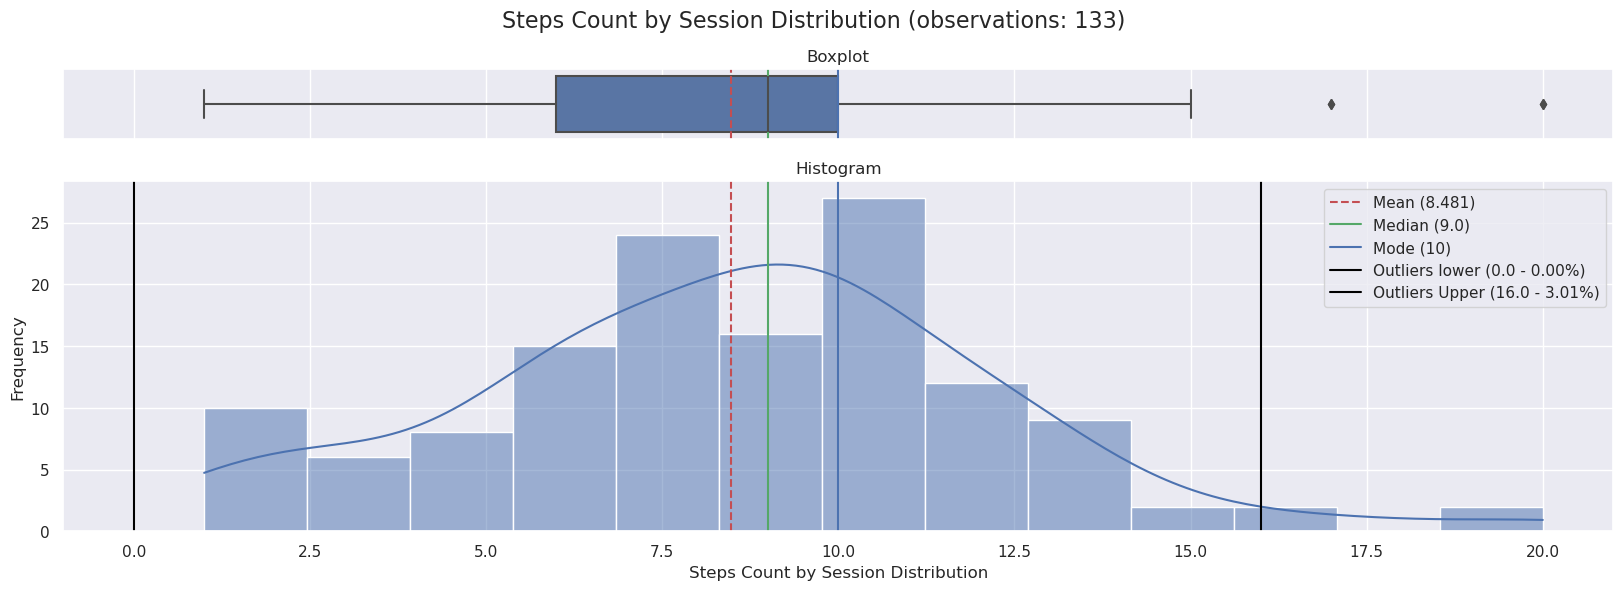

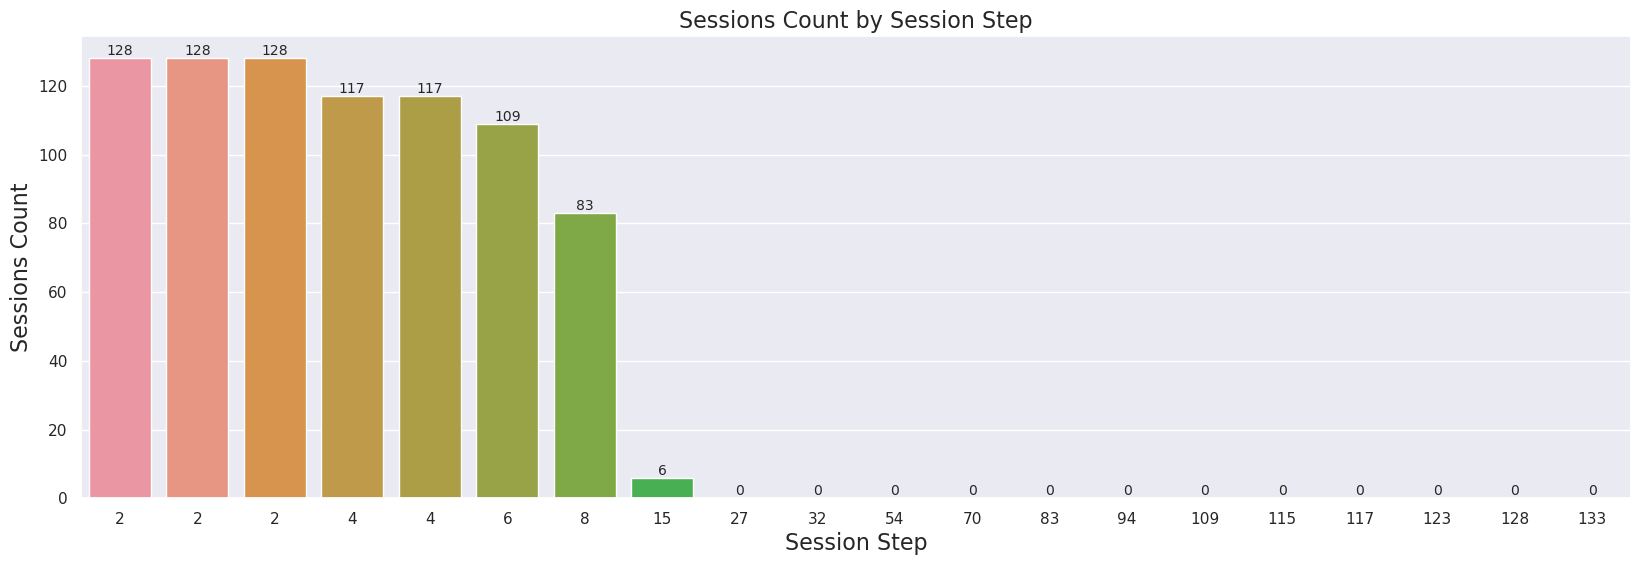

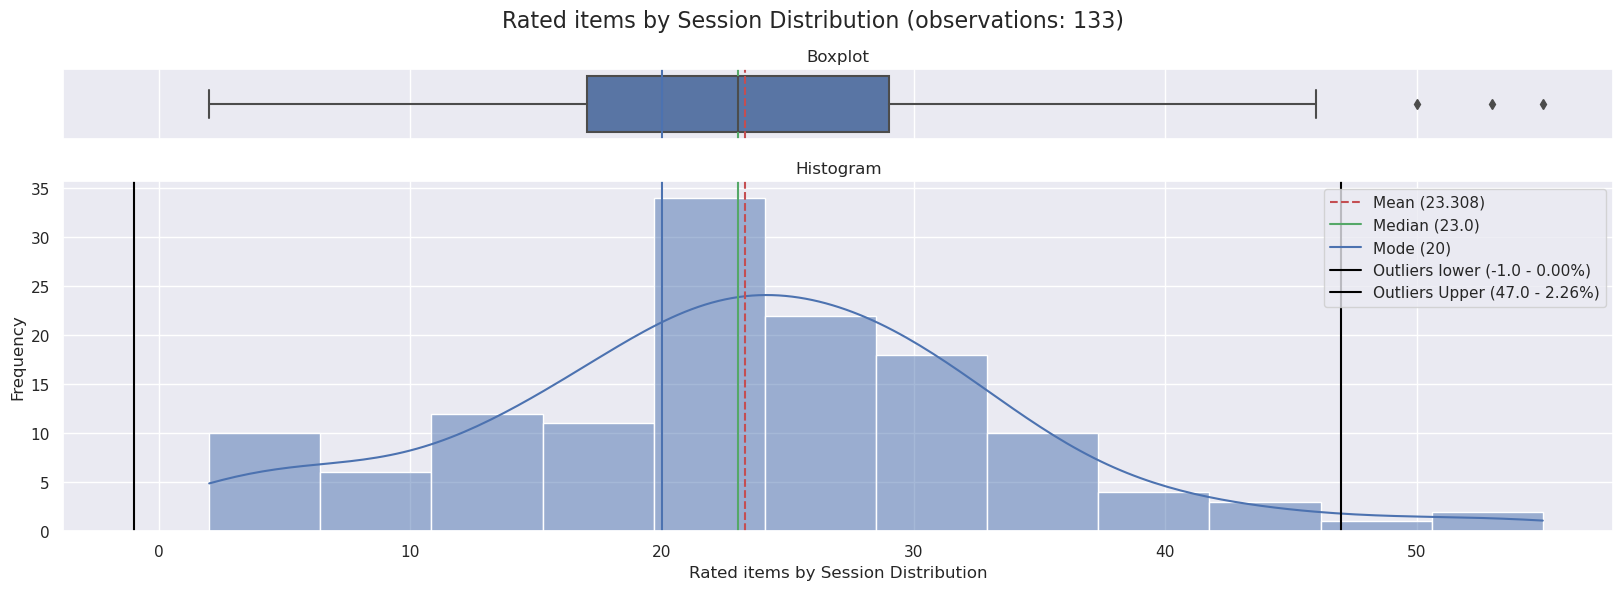

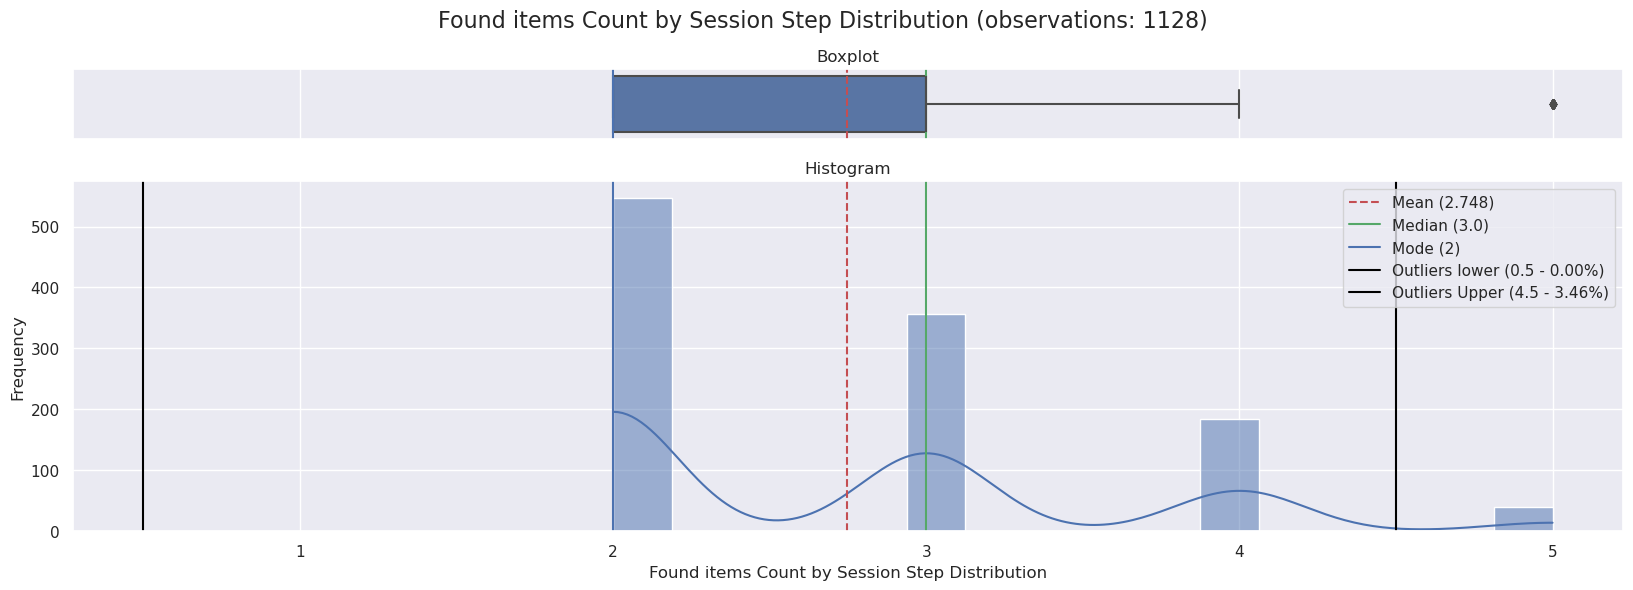

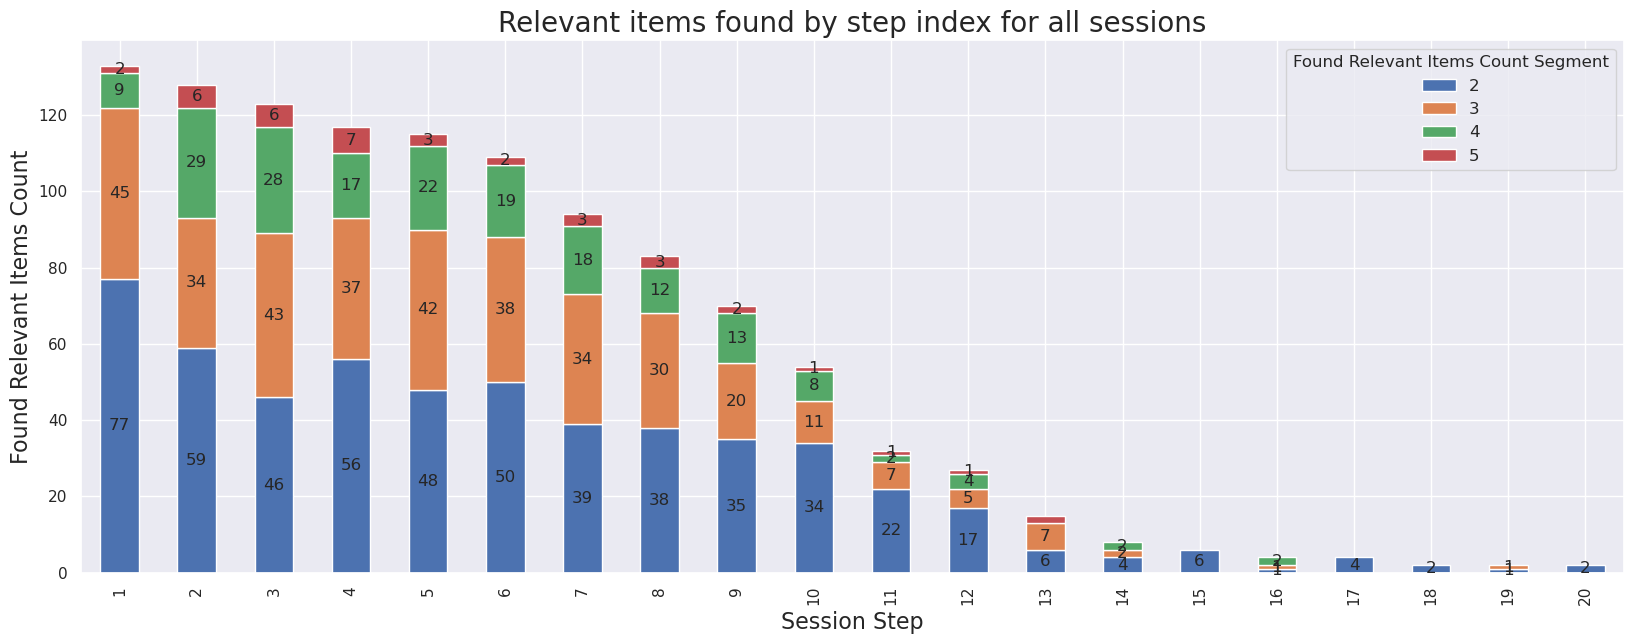

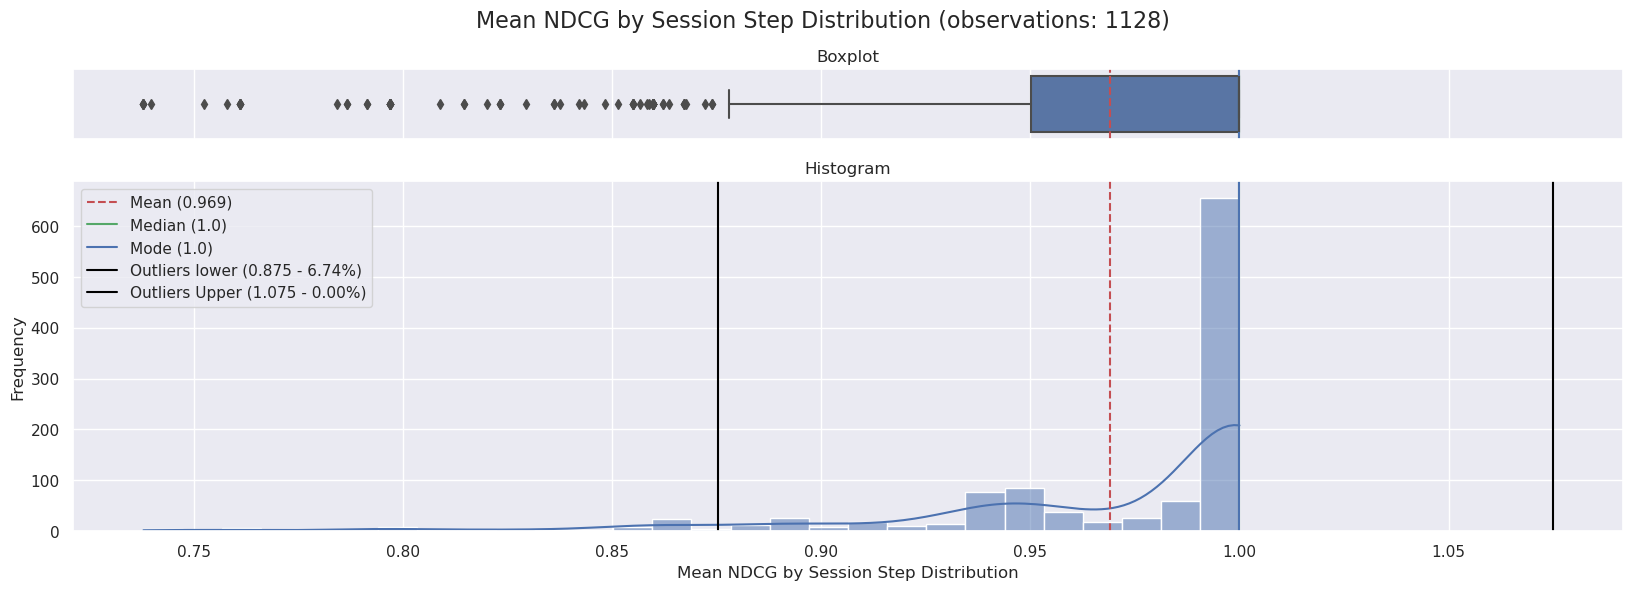

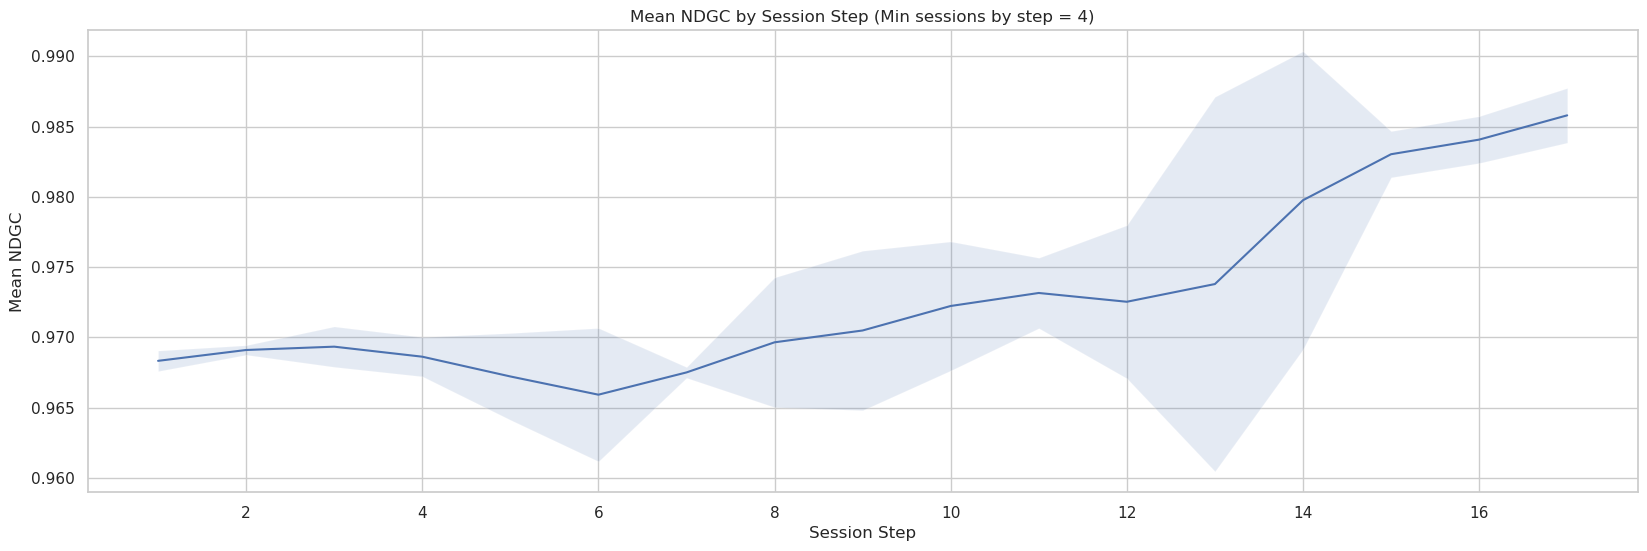

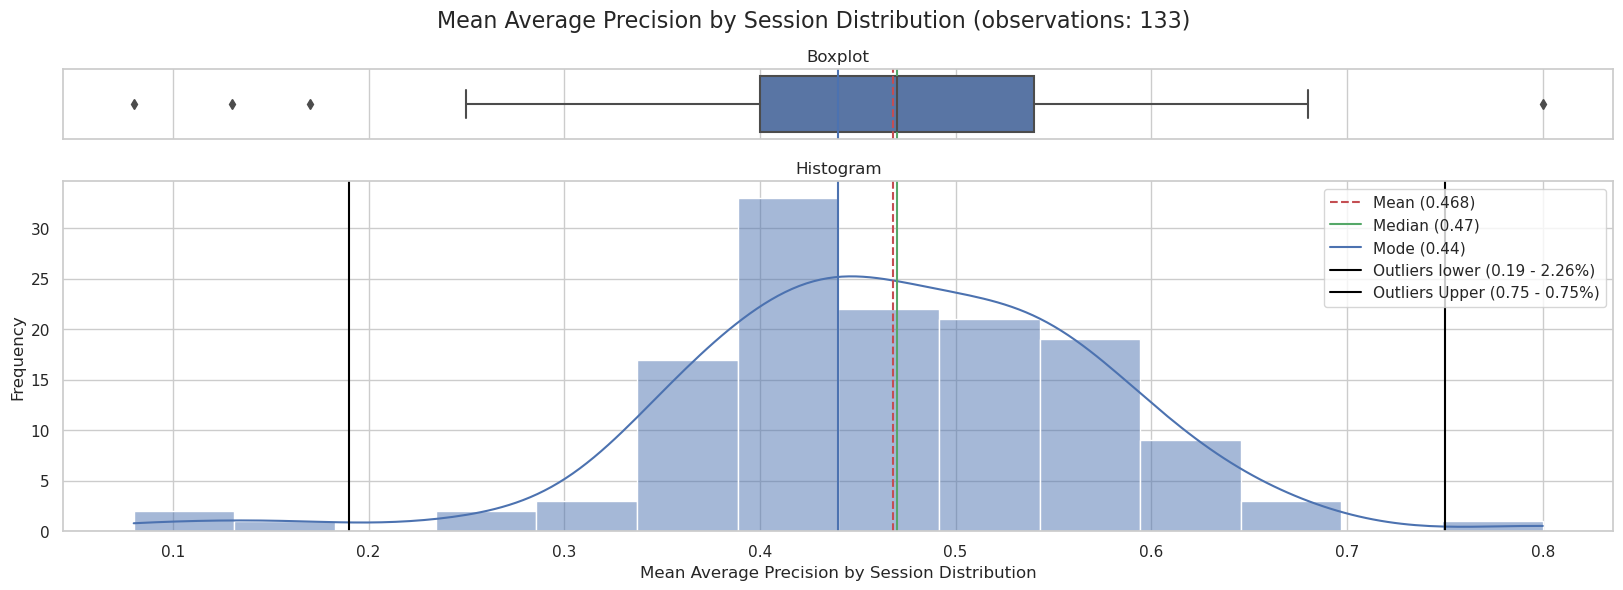

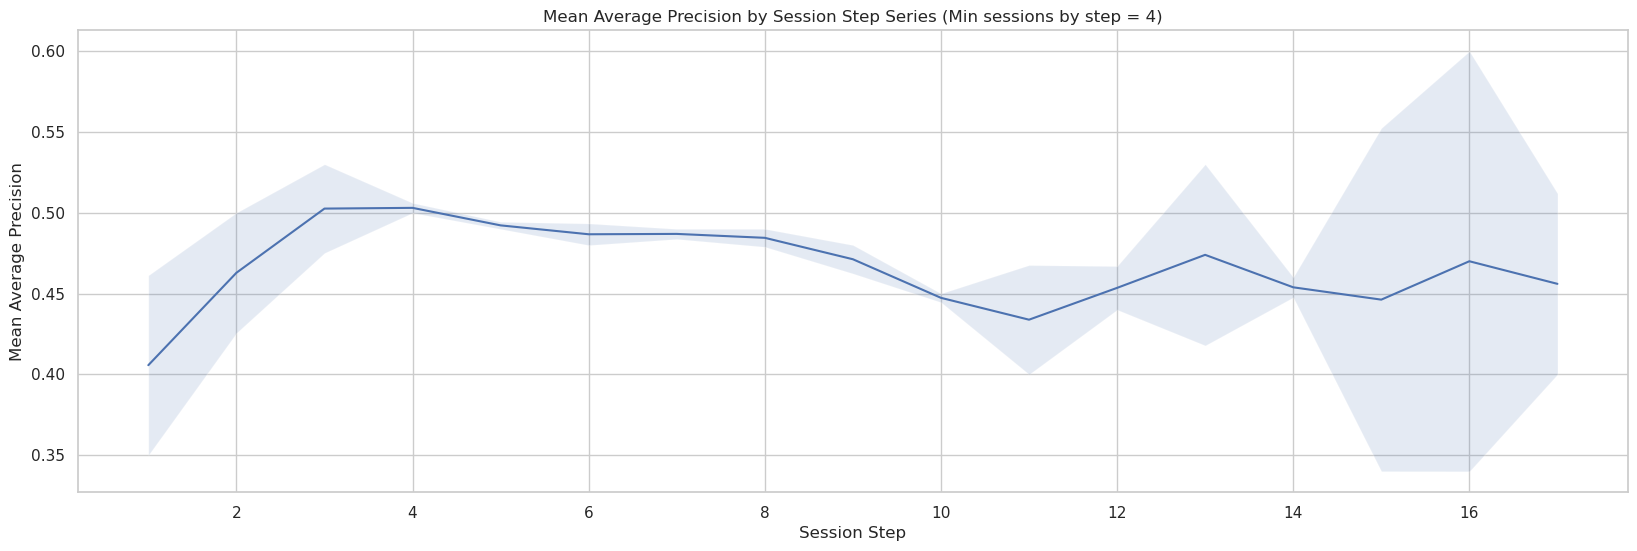

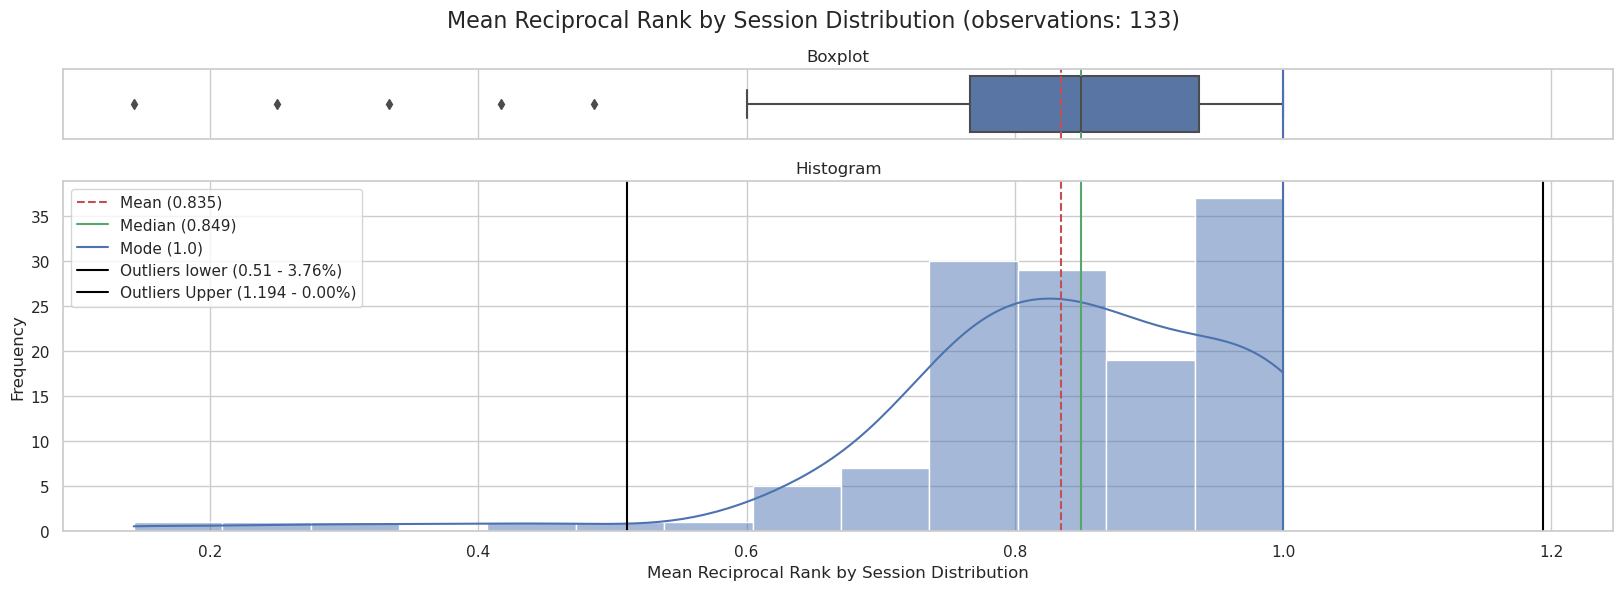

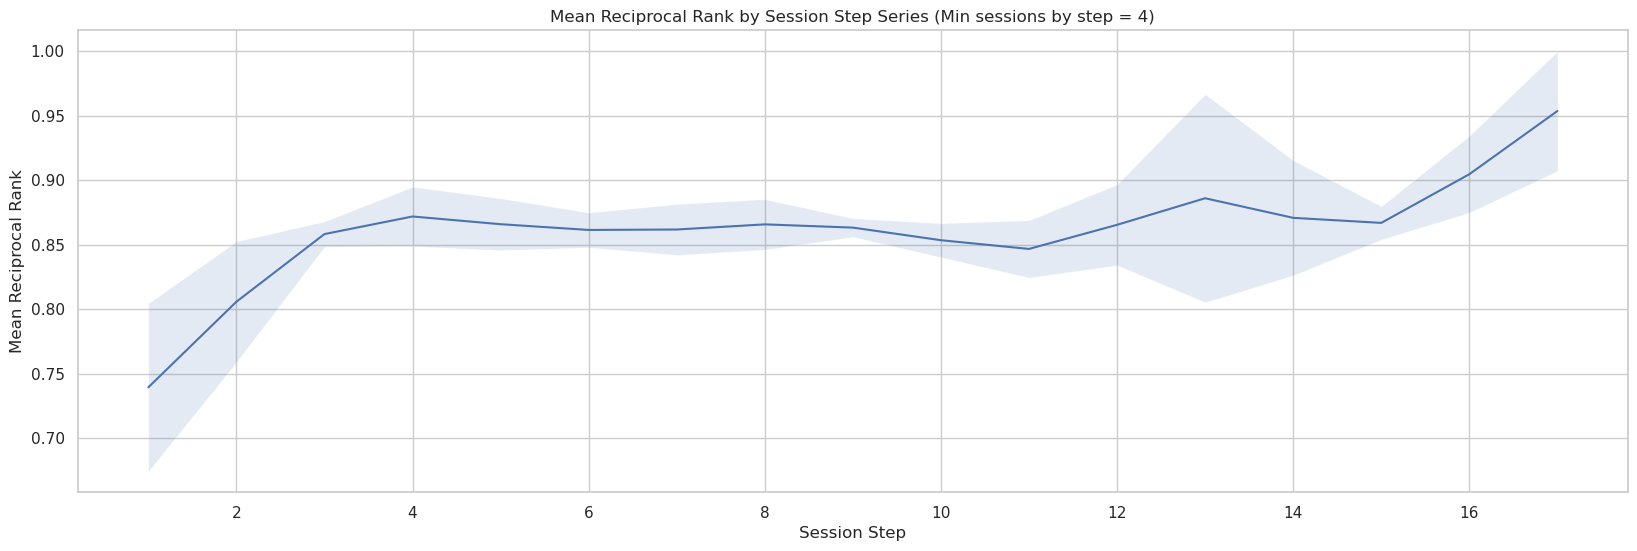

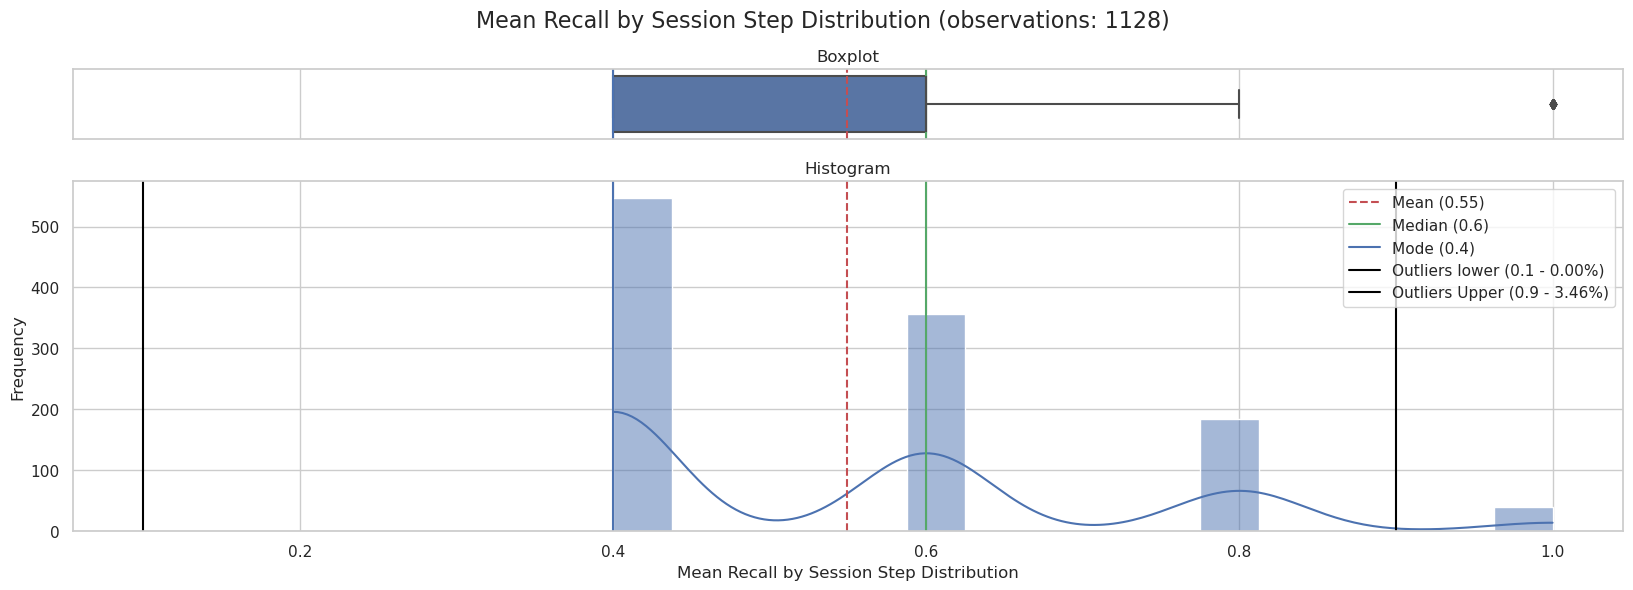

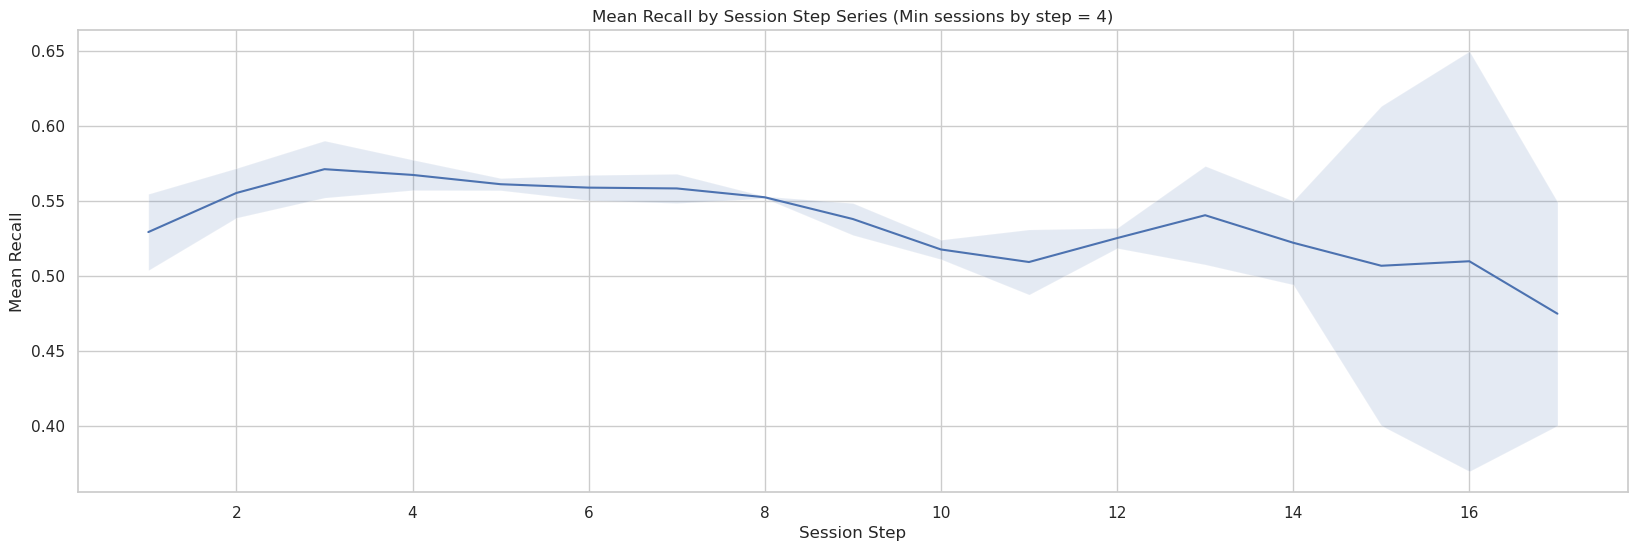

In [6]:
llama3_sessions.plotter.plot()